In [525]:
##Grabbing postseason offensive metrics for 2023 postseason teams

In [526]:
!pip install MLB-StatsAPI pandas
import pandas as pd
import statsapi


python(49638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [527]:
team_ids = {
    'ARI': 109,  # Diamondbacks
    'ATL': 144,  # Braves
    'LAD': 119,  # Dodgers
    'PHI': 143,  # Phillies
    'MIL': 158,  # Brewers
    'MIA': 146,  # Marlins
    'BAL': 110,  # Orioles
    'TEX': 140,  # Rangers
    'HOU': 117,  # Astros
    'MIN': 142,  # Twins
    'TBR': 139,  # Rays
    'TOR': 141   # Blue Jays
}
all_data = []

for team_name, team_id in team_ids.items():
    print(f"Fetching postseason data for {team_name}...")
    schedule = statsapi.schedule(
        start_date='2023-10-01',  # postseason start
        end_date='2023-11-02',    # end of World Series
        team=team_id,
    )


    postseason_games = [g for g in schedule if g['status'] == 'Final' and g['game_type'] != 'R']
    
    for game in postseason_games:
            gid = game['game_id']
            box = statsapi.boxscore_data(gid)
        
            if 'teamInfo' not in box:
                continue
    
            try:
                team_stats = (
                    box['away']
                    if box['teamInfo']['away']['id'] == team_id
                    else box['home']
                )
                hitting = team_stats['teamStats']['batting']
    
                all_data.append({
                    'team': team_name,
                    'game_id': gid,
                    'runs': hitting['runs'],
                    'hits': hitting['hits'],
                    'doubles': hitting['doubles'],
                    'triples': hitting['triples'],
                    'home_runs': hitting['homeRuns'],
                    'strike_outs': hitting['strikeOuts'],
                    'walks': hitting['baseOnBalls'],
                    'stolen_bases': hitting['stolenBases'],
                    'left_on_base': hitting['leftOnBase'],
                    'slug': hitting['slg'],
                    'ops': hitting['ops'],
                    'obp': hitting['obp'],
                })
            except KeyError:
                continue

df = pd.DataFrame(all_data)

Fetching postseason data for ARI...
Fetching postseason data for ATL...
Fetching postseason data for LAD...
Fetching postseason data for PHI...
Fetching postseason data for MIL...
Fetching postseason data for MIA...
Fetching postseason data for BAL...
Fetching postseason data for TEX...
Fetching postseason data for HOU...
Fetching postseason data for MIN...
Fetching postseason data for TBR...
Fetching postseason data for TOR...


In [528]:
df.head(100)

,team,game_id,runs,hits,doubles,triples,home_runs,strike_outs,walks,stolen_bases,left_on_base,slug,ops,obp
0,ARI,748582,6,9,1,0,3,10,7,2,22,.559,.949,.390
1,ARI,748578,5,6,1,0,1,11,3,0,7,.439,.768,.329
2,ARI,748555,11,13,4,0,4,9,3,0,9,.744,1.130,.386
3,ARI,748556,4,8,0,0,1,10,5,4,16,.571,.949,.378
4,ARI,748557,4,8,0,0,4,7,3,1,11,.588,.947,.359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,MIN,748566,2,3,1,0,2,14,2,0,3,.373,.681,.308
78,TBR,748581,0,6,1,0,0,7,1,0,12,.219,.431,.212
79,TBR,748580,1,8,1,0,0,11,0,0,16,.246,.473,.227
80,TOR,748585,1,6,1,0,0,7,3,0,15,.212,.482,.270


In [529]:
df.to_csv('mlb23_ps_offense.csv', index = False)

In [530]:
data = pd.read_csv('mlb23_ps_offense.csv')

In [531]:
data['extra_base_hits'] = data['doubles'] + data['triples'] + data['home_runs']
data['xbh_rate'] = data['extra_base_hits'] / data['hits'].replace(0, 1)
#data['walk_rate'] = data['walks'] / (data['walks'] + data['strike_outs']).replace(0, 1)
#data['singles'] = data['hits']-data['extra_base_hits']

In [532]:
data.head(10)

,team,game_id,runs,hits,doubles,triples,home_runs,strike_outs,walks,stolen_bases,left_on_base,slug,ops,obp,extra_base_hits,xbh_rate
0,ARI,748582,6,9,1,0,3,10,7,2,22,0.559,0.949,0.390,4,0.444444
1,ARI,748578,5,6,1,0,1,11,3,0,7,0.439,0.768,0.329,2,0.333333
2,ARI,748555,11,13,4,0,4,9,3,0,9,0.744,1.130,0.386,8,0.615385
3,ARI,748556,4,8,0,0,1,10,5,4,16,0.571,0.949,0.378,1,0.125000
4,ARI,748557,4,8,0,0,4,7,3,1,11,0.588,0.947,0.359,4,0.500000
5,ARI,748543,3,4,0,0,1,10,2,0,9,0.233,0.415,0.182,1,0.250000
6,ARI,748546,0,4,1,0,0,13,1,0,14,0.194,0.361,0.167,1,0.250000
7,ARI,748545,2,9,4,0,0,9,4,1,14,0.263,0.496,0.233,4,0.444444
8,ARI,748544,6,9,1,0,1,7,5,0,20,0.295,0.568,0.273,2,0.222222
9,ARI,748538,1,8,1,0,1,11,2,0,17,0.305,0.577,0.272,2,0.250000


In [533]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [534]:
#Seperate target from predictors
y = data.runs
X = data.drop(['runs','hits','left_on_base'], axis = 1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X,y, train_size = .8, test_size = .2, random_state = 0)

#This is overkill to highlight pipeline preprocessing knowledge. You could easily apply get_dummies and not impute any values
#as wouldn't make much sense in this case. 

categorical_cols  = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64'] ]

my_cols = categorical_cols + numerical_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

#one-hot categorical columns, scale numerical columns.

categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

numerical_transformer = Pipeline(steps = [
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('categorical', categorical_transformer, categorical_cols),
    ('numerical', numerical_transformer, numerical_cols)
])

#Define a model, we'll go with RandomForestRegressor 
my_model = RandomForestRegressor(n_estimators = 100, random_state = 0)

#Bundle preprocessing and model
my_pipeline = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('model', my_model)
])                        

# fit model

my_pipeline.fit(X_train, y_train)

pred = my_pipeline.predict(X_valid)

score = mean_absolute_error(pred, y_valid)

print('MAE:', score)


MAE: 1.1817647058823528


In [535]:
data_comp = data.copy()
data_comp.insert(3, 'predicted_runs', my_pipeline.predict(X))
data_comp.insert(4,'difference_runs', data_comp["runs"] - data_comp["predicted_runs"] )

data_comp.head(5)

,team,game_id,runs,predicted_runs,difference_runs,hits,doubles,triples,home_runs,strike_outs,walks,stolen_bases,left_on_base,slug,ops,obp,extra_base_hits,xbh_rate
0,ARI,748582,6,5.78,0.22,9,1,0,3,10,7,2,22,0.559,0.949,0.390,4,0.444444
1,ARI,748578,5,4.48,0.52,6,1,0,1,11,3,0,7,0.439,0.768,0.329,2,0.333333
2,ARI,748555,11,8.82,2.18,13,4,0,4,9,3,0,9,0.744,1.130,0.386,8,0.615385
3,ARI,748556,4,3.84,0.16,8,0,0,1,10,5,4,16,0.571,0.949,0.378,1,0.125000
4,ARI,748557,4,4.87,-0.87,8,0,0,4,7,3,1,11,0.588,0.947,0.359,4,0.500000


In [536]:
##Looking at the Diamondbacks' 2023 postseason offense

In [537]:
DBacks = data_comp[data_comp['team']=='ARI']

In [538]:
print("Mean run_prediction_difference (ARI):", DBacks["difference_runs"].mean())

Mean run_prediction_difference (ARI): 0.4358823529411764


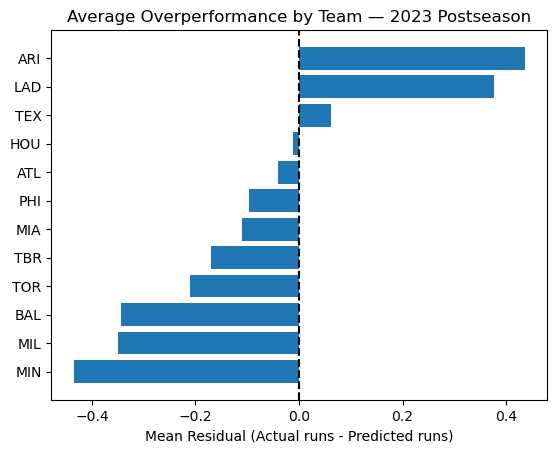

In [539]:
import matplotlib.pyplot as plt

team_run_difference = data_comp.groupby("team")["difference_runs"].mean().sort_values()
plt.barh(team_run_difference.index, team_run_difference.values)
plt.title("Average Overperformance by Team — 2023 Postseason")
plt.xlabel("Mean Residual (Actual runs - Predicted runs)")
plt.axvline(0, color="black", linestyle="--")
plt.show()

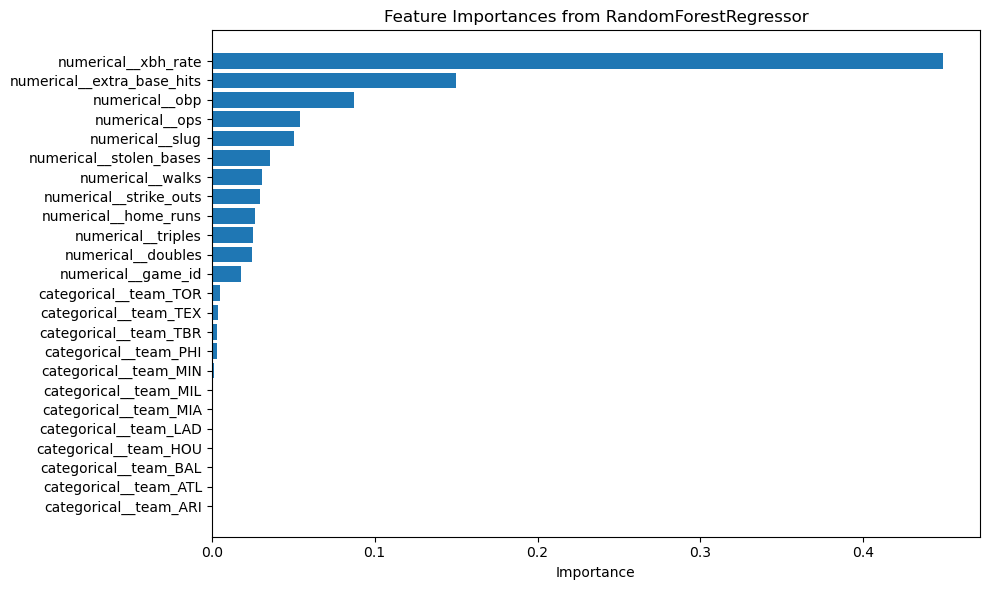

In [540]:
feature_names = my_pipeline.named_steps['preprocessing'].get_feature_names_out()
my_model = my_pipeline.named_steps['model']

importances = pd.Series(my_model.feature_importances_, index=feature_names).sort_values(ascending=True)
feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_importances['feature'], feat_importances['importance'])
plt.gca().invert_yaxis()  # most important on top
plt.title("Feature Importances from RandomForestRegressor")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

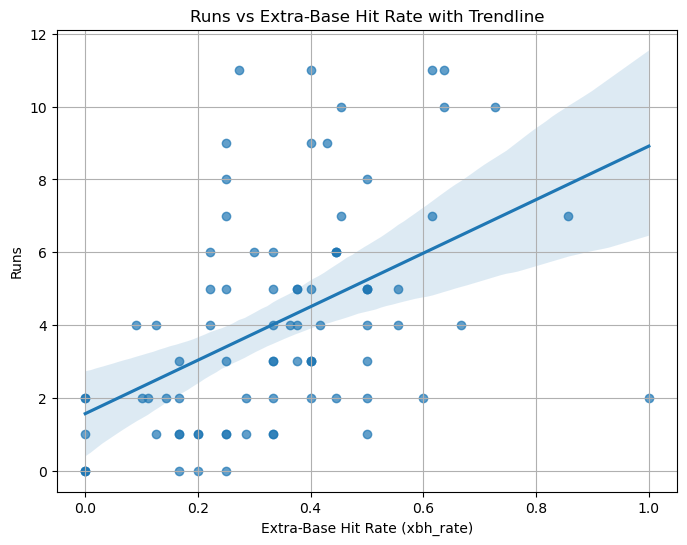

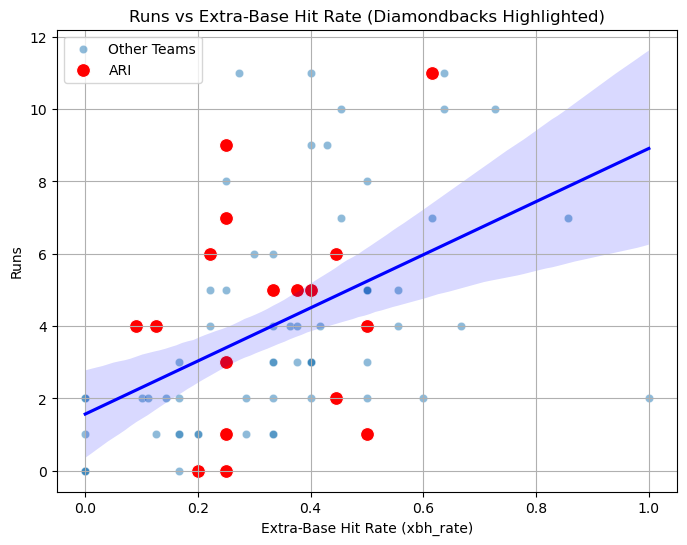

In [541]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='xbh_rate', y='runs', data=data, scatter_kws={'alpha':0.7})
plt.xlabel("Extra-Base Hit Rate (xbh_rate)")
plt.ylabel("Runs")
plt.title("Runs vs Extra-Base Hit Rate with Trendline")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='xbh_rate', y='runs', data=data, alpha=0.5, label='Other Teams')
sns.scatterplot(x='xbh_rate', y='runs', data=data[data['team']=='ARI'], color='red', s=100, label='ARI')
sns.regplot(x='xbh_rate', y='runs', data=data, scatter=False, color='blue')
plt.xlabel("Extra-Base Hit Rate (xbh_rate)")
plt.ylabel("Runs")
plt.title("Runs vs Extra-Base Hit Rate (Diamondbacks Highlighted)")
plt.legend()
plt.grid(True)
plt.show()